In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler


#from sklearn.decomposition import PCA
#from scipy.stats import zscore

In [2]:
# Read the dataset

dataset = pd.read_csv('wine.csv', names = ["Cultivator", "Alchol", "Malic_Acid", "Ash", "Alcalinity_of_Ash", "Magnesium", "Total_phenols", "Falvanoids", "Nonflavanoid_phenols", "Proanthocyanins", "Color_intensity", "Hue", "OD280", "Proline"])


In [3]:
print("Shape of the dataset: ", dataset.shape)

dataset.head(5)

Shape of the dataset:  (178, 14)


,Cultivator,Alchol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Falvanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Cultivator              178 non-null int64
Alchol                  178 non-null float64
Malic_Acid              178 non-null float64
Ash                     178 non-null float64
Alcalinity_of_Ash       178 non-null float64
Magnesium               178 non-null int64
Total_phenols           178 non-null float64
Falvanoids              178 non-null float64
Nonflavanoid_phenols    178 non-null float64
Proanthocyanins         178 non-null float64
Color_intensity         178 non-null float64
Hue                     178 non-null float64
OD280                   178 non-null float64
Proline                 178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


C:\Users\91976\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\91976\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


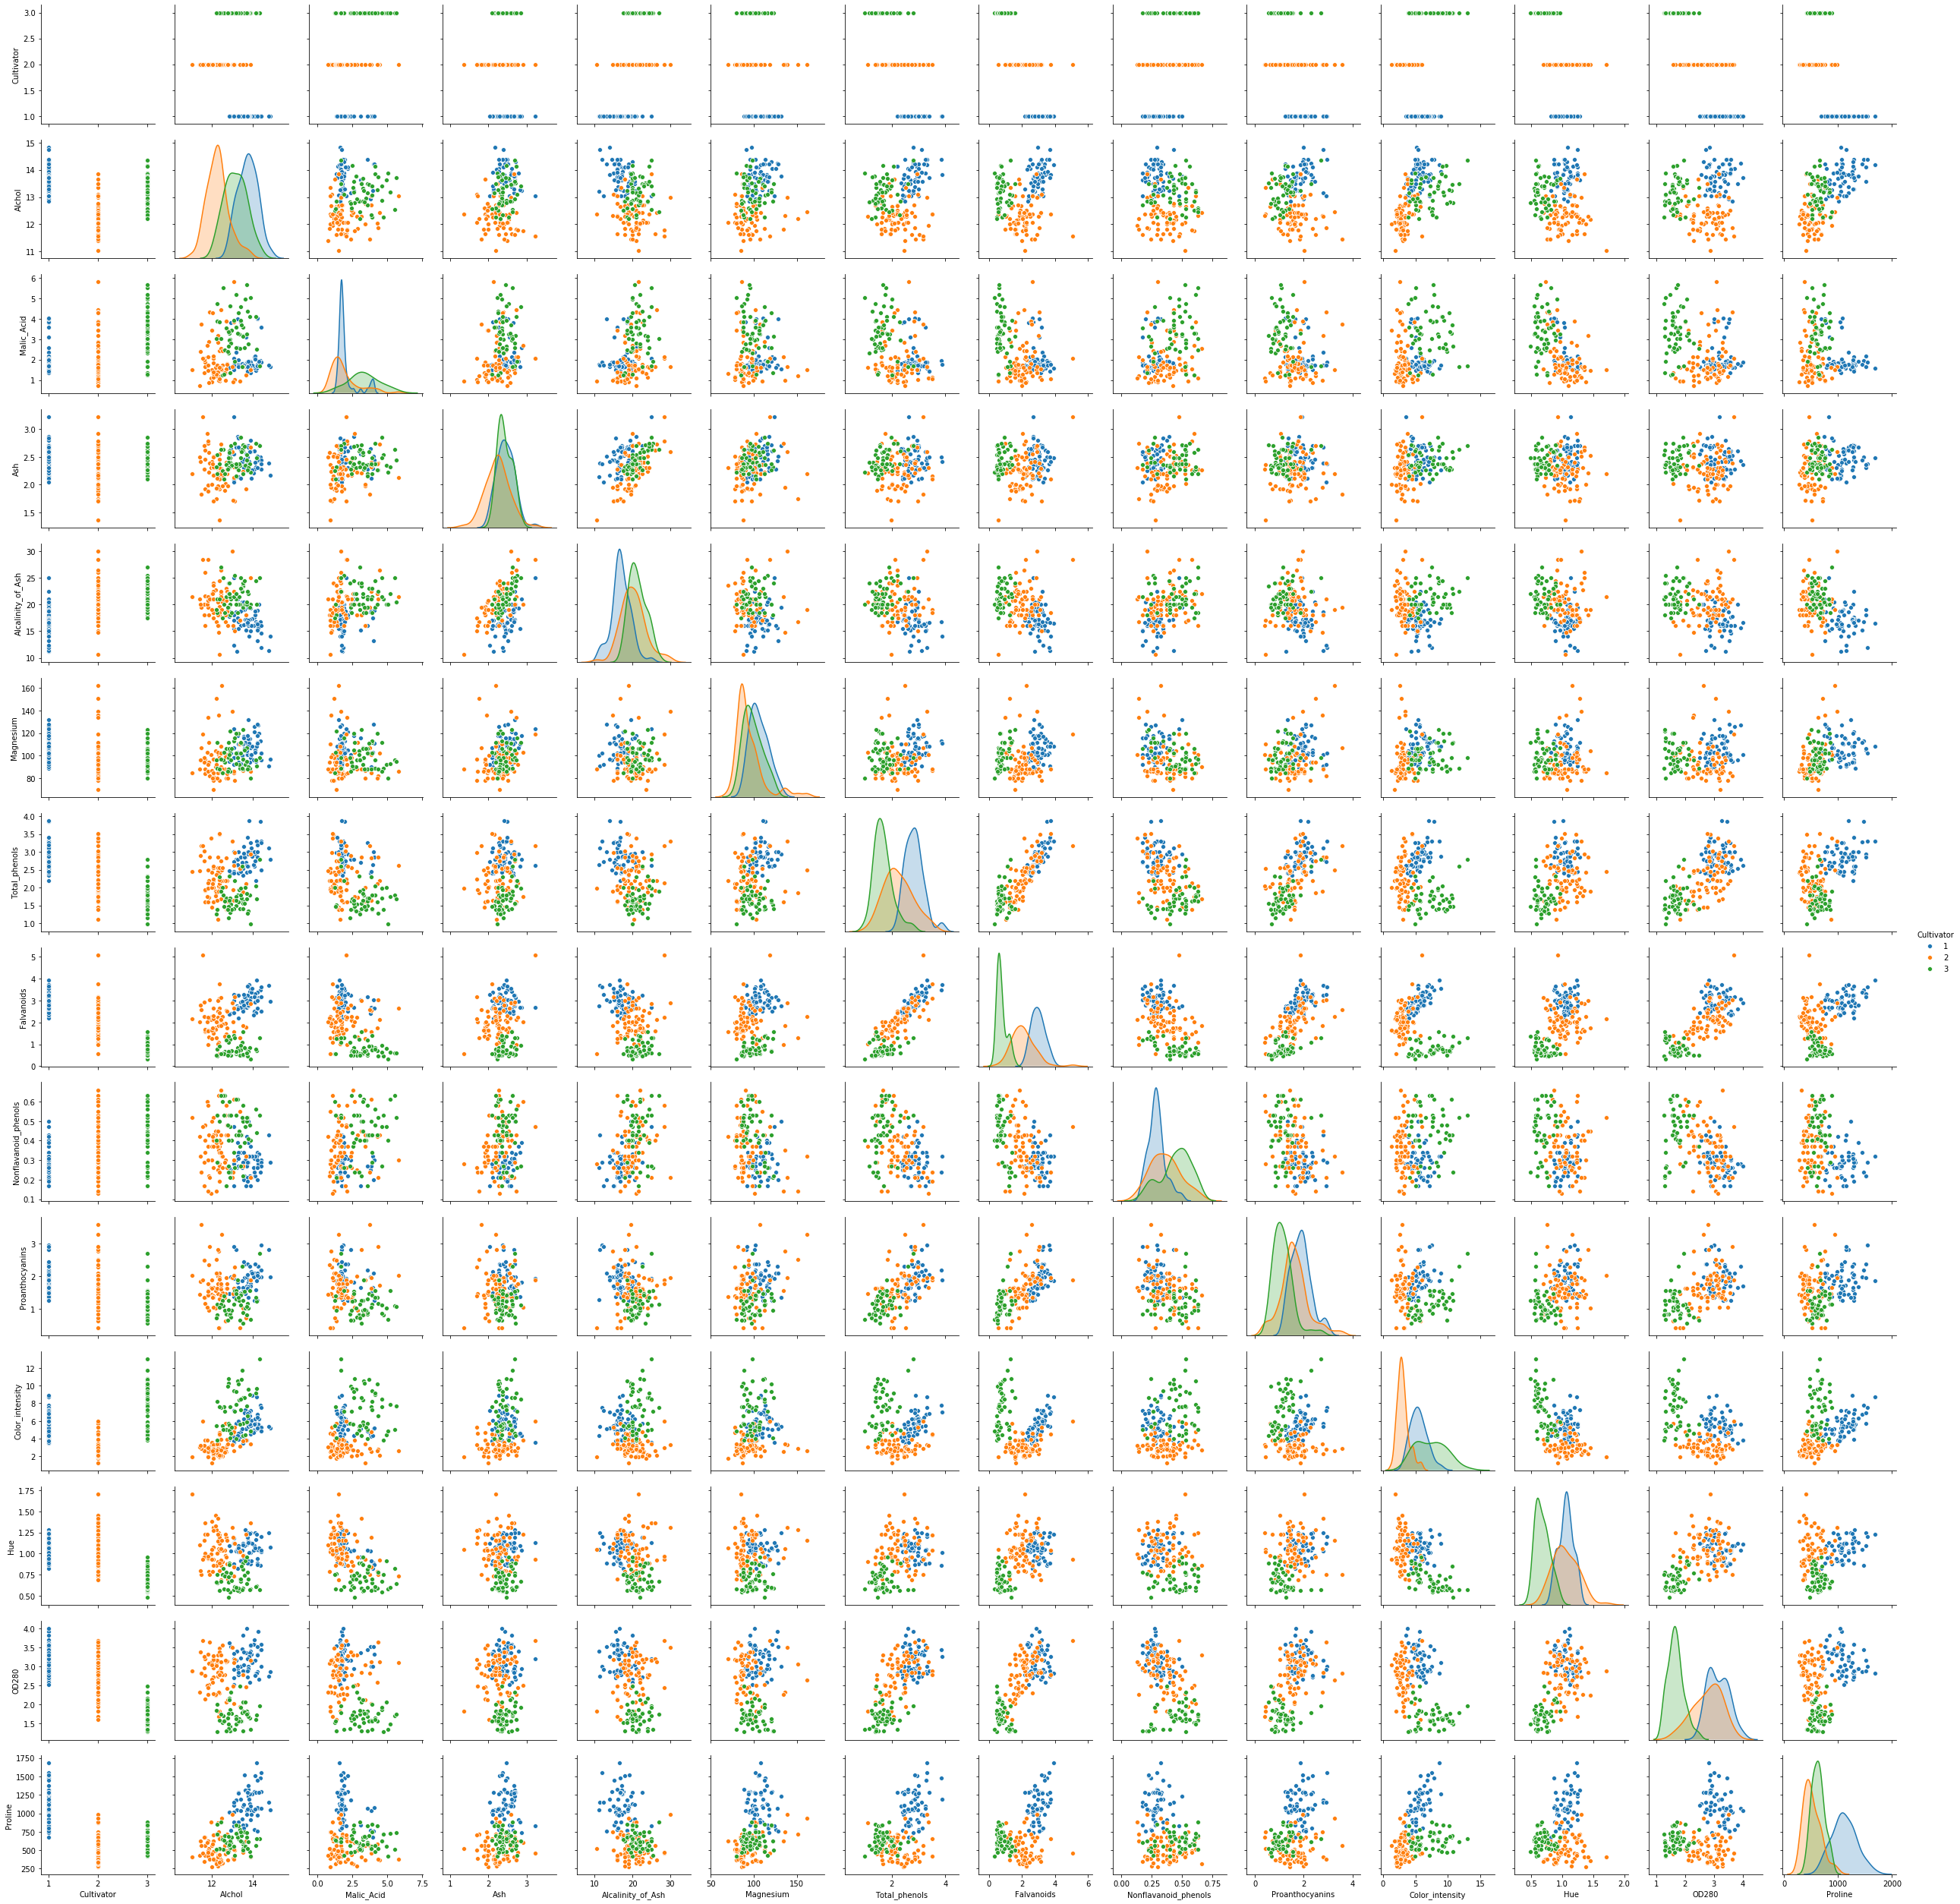

In [5]:
sns.pairplot(dataset, diag_kind='kde', hue='Cultivator')

In [6]:
from sklearn.model_selection import train_test_split

X =  dataset.drop("Cultivator", axis=1)
y =  dataset.pop("Cultivator")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35 , random_state=100)


In [7]:
# need to perform scaling for PCA
sc = StandardScaler()

X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [8]:
# to add


In [9]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA()

X_train_proj = pca.fit_transform(X_train_std)
X_test_proj = pca.transform(X_test_std)

print("Explained variance:\n", pca.explained_variance_)
print()
print()
print("Explained variance Ratio:\n", pca.explained_variance_ratio_)
print()
print()
print("Eigen Vectors:\n",pca.components_)


Explained variance:
 [4.64912483 2.74010608 1.51804409 1.14201291 0.64293705 0.54815449
 0.49895791 0.37911149 0.27555365 0.2566362  0.20207361 0.17922823
 0.08209456]


Explained variance Ratio:
 [0.3545152  0.20894454 0.11575721 0.08708326 0.04902664 0.04179907
 0.03804763 0.02890884 0.02101212 0.01956958 0.01540896 0.0136669
 0.00626005]


Eigen Vectors:
 [[ 0.19188069 -0.20615371  0.03611931 -0.27531208  0.14727449  0.40001402
   0.42470946 -0.33689707  0.31121254 -0.02424212  0.24261458  0.35274177
   0.29541977]
 [-0.43623236 -0.22187147 -0.18545599  0.15447546 -0.3537501   0.00519848
   0.08072265 -0.09249554  0.02804291 -0.53200986  0.29331308  0.24487442
  -0.36354246]
 [-0.1472047   0.2394364   0.69331135  0.50478799  0.19496406  0.14337461
   0.17631161  0.19573979  0.13273845 -0.09655537  0.0086135   0.17158438
  -0.03293182]
 [-0.070098    0.54205727 -0.24104545  0.00772477 -0.22250122  0.13291704
   0.0826444  -0.23009562  0.45329288  0.07484055 -0.49379917  0.12982622
  

In [10]:
print(X_train_proj.shape)
print(X_test_proj.shape)

(115, 13)
(63, 13)


In [11]:
# Applying PCA 
# DECISION : To ratain 10 components
# ==================================

from sklearn.decomposition import PCA
pca = PCA(n_components=10)
X_train_proj = pca.fit_transform(X_train_std)
X_test_proj = pca.transform(X_test_std)

print("Explained variance:\n", pca.explained_variance_)
print()
print()
print("Explained variance Ratio:\n", pca.explained_variance_ratio_)
print()
print()
print("Eigen Vectors:\n",pca.components_)


Explained variance:
 [4.64912483 2.74010608 1.51804409 1.14201291 0.64293705 0.54815449
 0.49895791 0.37911149 0.27555365 0.2566362 ]


Explained variance Ratio:
 [0.3545152  0.20894454 0.11575721 0.08708326 0.04902664 0.04179907
 0.03804763 0.02890884 0.02101212 0.01956958]


Eigen Vectors:
 [[ 0.19188069 -0.20615371  0.03611931 -0.27531208  0.14727449  0.40001402
   0.42470946 -0.33689707  0.31121254 -0.02424212  0.24261458  0.35274177
   0.29541977]
 [-0.43623236 -0.22187147 -0.18545599  0.15447546 -0.3537501   0.00519848
   0.08072265 -0.09249554  0.02804291 -0.53200986  0.29331308  0.24487442
  -0.36354246]
 [-0.1472047   0.2394364   0.69331135  0.50478799  0.19496406  0.14337461
   0.17631161  0.19573979  0.13273845 -0.09655537  0.0086135   0.17158438
  -0.03293182]
 [-0.070098    0.54205727 -0.24104545  0.00772477 -0.22250122  0.13291704
   0.0826444  -0.23009562  0.45329288  0.07484055 -0.49379917  0.12982622
  -0.21066981]
 [-0.415685   -0.14383348 -0.1193587  -0.12820171  0.7

In [12]:
print(X_train_proj.shape)
print(X_test_proj.shape)

(115, 10)
(63, 10)


In [13]:
# To add
